<a href="https://colab.research.google.com/github/2pterons/pterons/blob/main/Word2Vec_kor(movie).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
!pip install konlpy
from konlpy.tag import Okt

     |████████████████████████████████| 19.4MB 26.3MB/s 
     |████████████████████████████████| 92kB 11.6MB/s 
     |████████████████████████████████| 450kB 35.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f9879cea310>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
# 상위 5개 출력
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
# 리뷰 개수 출력
print(len(train_data))

200000


In [ ]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [ ]:
# NUll 값 갯수 확인
train_data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [ ]:
# null 값이 존재하는 행 제거
train_data = train_data.dropna(how = 'any')
# null 값이 존재하는지 확인
print(train_data.isnull().values.any())

False


In [ ]:
# 리뷰 개수 출력
print(len(train_data))

199992


In [ ]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고지금다시봐도재밌어요ㅋㅋ,1
1,8132799,디자인을배우는학생으로외국디자이너와그들이일군전통을통해발전해가는문화산업이부러웠는데사실우...,1
2,4655635,폴리스스토리시리즈는부터뉴까지버릴께하나도없음최고,1
3,9251303,와연기가진짜개쩔구나지루할거라고생각했는데몰입해서봤다그래이런게진짜영화지,1
4,10067386,안개자욱한밤하늘에떠있는초승달같은영화,1


In [ ]:
len(train_data)

199992

In [ ]:
# 불용어 정의
stopwords=['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '한다.']

In [ ]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
  temp_X = okt.morphs(sentence, stem=True) #토큰화
  temp_X = [word for word in temp_X if not word in stopwords] #불용어 제거
  tokenized_data.append(temp_X)

리뷰의 최대 길이 : 68
리뷰의 평균 길이 : 10.830838233529342


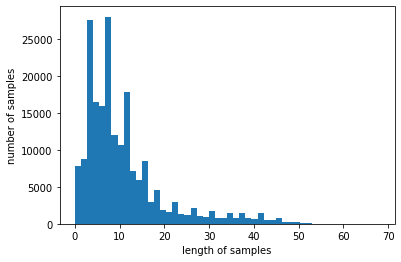

In [ ]:
# 리뷰 길이 불포 확인
print('리뷰의 최대 길이 :', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(17948, 100)

In [ ]:
model.wv.most_similar("최민식")

[('한석규', 0.9105510711669922),
 ('안성기', 0.8999066352844238),
 ('설경구', 0.886179506778717),
 ('최민수', 0.8842660784721375),
 ('이정재', 0.8831555843353271),
 ('신들리다', 0.8817051649093628),
 ('류덕환', 0.876172661781311),
 ('김수현', 0.8750184774398804),
 ('김창완', 0.8747607469558716),
 ('이요원', 0.8662889003753662)]

In [ ]:
print(model.wv.most_similar("히어로"))

[('느와르', 0.8689439296722412), ('블록버스터', 0.8672584295272827), ('슬래셔', 0.8435765504837036), ('무비', 0.8431229591369629), ('물', 0.8344707489013672), ('무협', 0.8264791369438171), ('호러', 0.8250414133071899), ('멜로', 0.82074373960495), ('물의', 0.8012821674346924), ('정통', 0.796237051486969)]
